##### Read & Write Files

In [ ]:
with open('analysis.txt', mode='w') as w:
    with open("../../data/2_84V_raw_b0_seg0.bin" , mode='rb') as f:
        ev_count = 0
        while (True):
            try:
                ev_header = f.read(4 << 2)
                ## VALIDATE EVENT 
                ev_check = ev_header[3] >> 4 
                if (ev_check != 10):
                    break
                ## GET EVENT SIZE
                ev_size = get_bits(ev_header[:4], 27)
                ## GET CHANNEL MASK
                ev_chn_mask = get_chn(ev_header[4])
                ## GET BOARD EVENT COUNT
                ev_count = to_int(ev_header[8:11])
                ## WRITE FILE
                # print(ev_size, ev_chn_mask, ev_count)
                # w.write(f"event count: #{ev_count}\n")
                
                line_count = 3
                while(len(ev_chn_mask)):
                    chn_header = f.read(3 << 2)
                    ## GET CHANNEL SIZE
                    chn_size = get_bits(chn_header[:3], 22) 
                    chn_id = ev_chn_mask.pop(0)
                    # w.write(f"channel id: #{chn_id}\n")
                    plt.plot(range())
                    ## WRITE FILE TEST
                    # sig_list = [f"{i:>5} {to_int(f.read(2))}\n" for i in range((chn_size - 3) << 1)]
                    # sig_list = [str(i)+" "+ str(to_int(f.read(2))) + "\n" for i in range((chn_size - 3) << 1)]
                    # w.writelines(sig_list)
                ## CONTROL LOOP
                if ev_count > 1:
                    break
            except Exception as e:
                print(e)
                break
            

##### Time

In [27]:
np.array([[1,2],[3,4]])*[2,1]

array([[2, 2],
       [6, 4]])

In [17]:
# sig_fft = np.fft.fft(event_list)   #TEMP
# sig_fft[75:125]=0   #TEMP
# event_list = np.fft.fft(sig_fft).real[::-1] / 200    #TEMP

-2.0

In [4]:
import time
import numpy as np
a = range(1000000)
T1 = time.time()
# b = []
# for i in a:
#     b.append(i**2)
b = np.empty((10000,5))
b[0] = [1,2,2,2,2]
T2 = time.time()
print( f'Total time:{(T2 - T1)*1000000}')
b[0]

Total time:70.33348083496094


array([1., 2., 2., 2., 2.])

In [14]:
import time
T1 = time.time()
for i in range(1000000):
    a =  0
T2 = time.time()
print( f'Total time:{(T2 - T1)*1000000} us')

Total time:42373.1803894043 us


In [174]:
s = np.array([np.random.randint(0,10) for i in range(100000)])
s2 = np.array([np.random.randint(0,10) for i in range(100000)])
import time
T1 = time.time()
# b = dict(zip(s , s2))
# b = dict(np.array((s,s2)).T)
# b = np.array([np.fromstring(i, sep=',') for i in (s,s2)], dtype=float).T
# b = np.loadtxt((s,s2), delimiter=',', dtype=float).T
T2 = time.time()
print( f'Total time:{(T2 - T1)*1000000} us')
b = dict(b)
b

Total time:73513.03100585938 us


{2: 6, 9: 9, 0: 0, 4: 1, 3: 7, 8: 4, 1: 4, 7: 7, 5: 9, 6: 8}

In [225]:
s1 = ','.join([str(np.random.rand()) for i in range(100000)])
s2 = ','.join([str(np.random.rand()) for i in range(100000)])
import time
b = np.array([np.fromstring(s, sep=',') for s in (s1, s2)]).T
T1 = time.time()
# b = dict(zip(*[np.fromstring(s, sep=',') for s in (s1, s2)]))
b = np.asarray(b, np.uint32)
T2 = time.time()
print( f'Total time:{(T2 - T1)*1000000} us')
b

Total time:168.32351684570312 us


array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=uint32)

In [56]:
s = np.random.random(100000)
%timeit  len(s)
%timeit s.shape[0]

48.6 ns ± 1.27 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
61.2 ns ± 0.727 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [63]:
%timeit b = np.sqrt(np.sum(s **2)/len(s) - (np.sum(s)/len(s)) ** 2)
%timeit b  = 1

7.98 µs ± 62.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
7.05 ns ± 0.00405 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


In [2]:
from scipy.special import factorial
import numpy as np
from scipy.optimize import leastsq, curve_fit, basinhopping
import random, math
import matplotlib.pyplot as plt
from collections import Counter

np.set_printoptions(linewidth=300,precision=3, suppress=True)
items = 30

def poisson_dist(n, l):
    return l ** n * np.exp(-l) / factorial(n)

def gaussion_dist(x, d, s):
    return np.exp(-(x-d) ** 2 / (2 * s ** 2)) / (math.sqrt(2 * math.pi) * s)

def dist_func(x, A, de, s0, se, le):
    func = lambda k: A * poisson_dist(k, le) * gaussion_dist(x, k * de, np.sqrt(s0 ** 2 + k * se ** 2)) 
    return sum(func(i) for i in range(items))

def dist_func_r(x, A, de, s0, se, le, k):
    return A * poisson_dist(k, le) * gaussion_dist(x, k * de, np.sqrt(s0 ** 2 + k * se ** 2)) 

## Method : Use `curve_fit`
def process_data(x,y):
    func = dist_func
    init_args = [22000, 3, 0.9, 1.1, 1]
    bounds = (0,(50000, 10,3,8,20))
    popt, pcov = curve_fit(func, x, y,p0=init_args,bounds=bounds, maxfev = 100000 ) # ......
    return x, func(x, *popt), popt, pcov

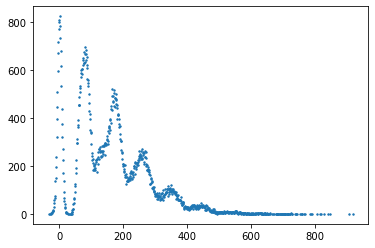

In [12]:
tot = []
for i in range(100000):
    n = np.random.poisson(2)
    a = 100 * np.random.normal(n * 2.28, math.sqrt(0.2 ** 2 + n * .2 ** 2))
    m = a * gaussion_dist( random.random() - 1  , 0 , 1)
    tot.append(round(m))
tot = Counter(tot)
plt.scatter(tot.keys(), tot.values(), s = 2)

In [46]:
n = np.random.poisson(.5)
a = np.random.normal(n * 2.28, math.sqrt(0.86 ** 2 + n * 1.4 ** 2))
a

2.4736124438917244

In [174]:
{1:1}[2]

KeyError: 2

In [4]:
round(np.array((1,2,3)))

TypeError: type numpy.ndarray doesn't define __round__ method